In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("n_learn_evaluting_NoiseInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.147607,0,0.085404,0
1,0,1,0.014211,0,0.042572,0
2,0,2,0.009707,0,0.039850,0
3,0,3,0.008048,0,0.043571,0
4,0,4,0.008852,0,0.043844,0


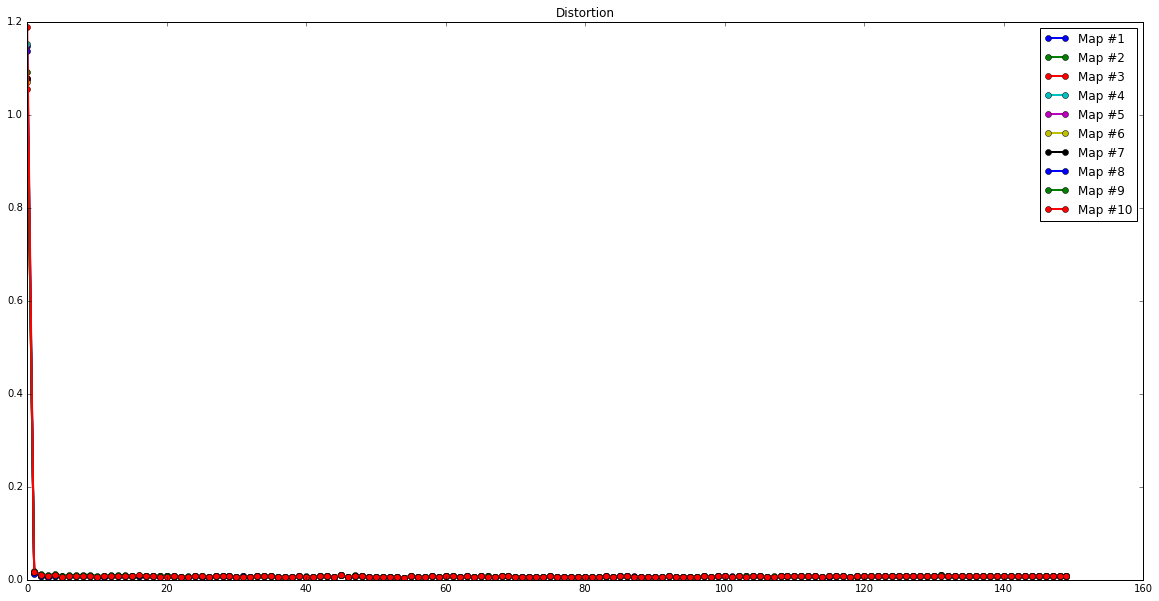

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

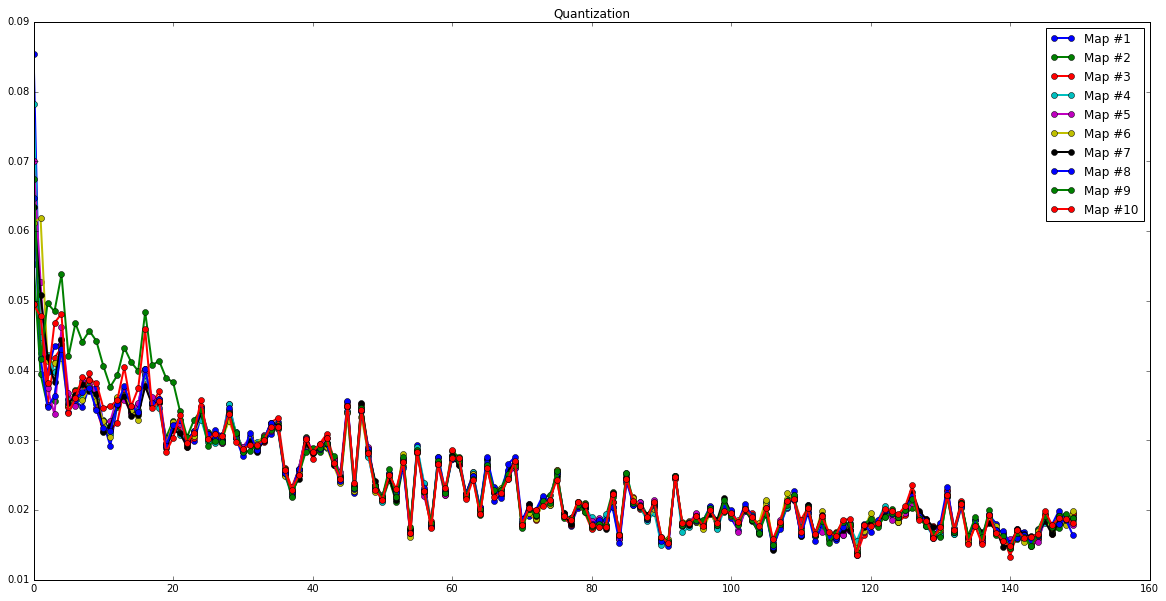

In [6]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [8]:
df_v = pd.read_csv("n_valid_evaluting_NoiseInj.txt", sep=';')
df_v.head(10)

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.114423,0,0.070553,0
1,0,1,0.014455,0,0.036482,0
2,0,2,0.010375,0,0.044238,0
3,0,3,0.010061,0,0.047799,0
4,0,4,0.009644,0,0.044387,0
5,0,5,0.009092,0,0.044733,0
6,0,6,0.008929,0,0.038455,0
7,0,7,0.008756,0,0.039055,0
8,0,8,0.008096,0,0.031653,0
9,0,9,0.009502,0,0.040493,0


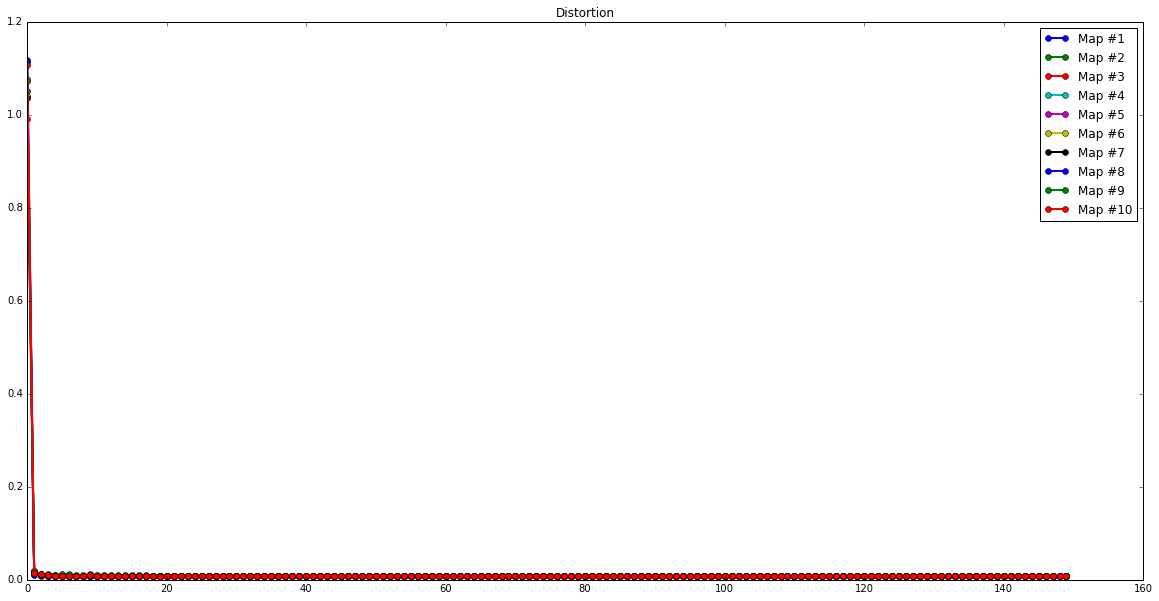

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
#     plt.xlim([-1, 10])
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

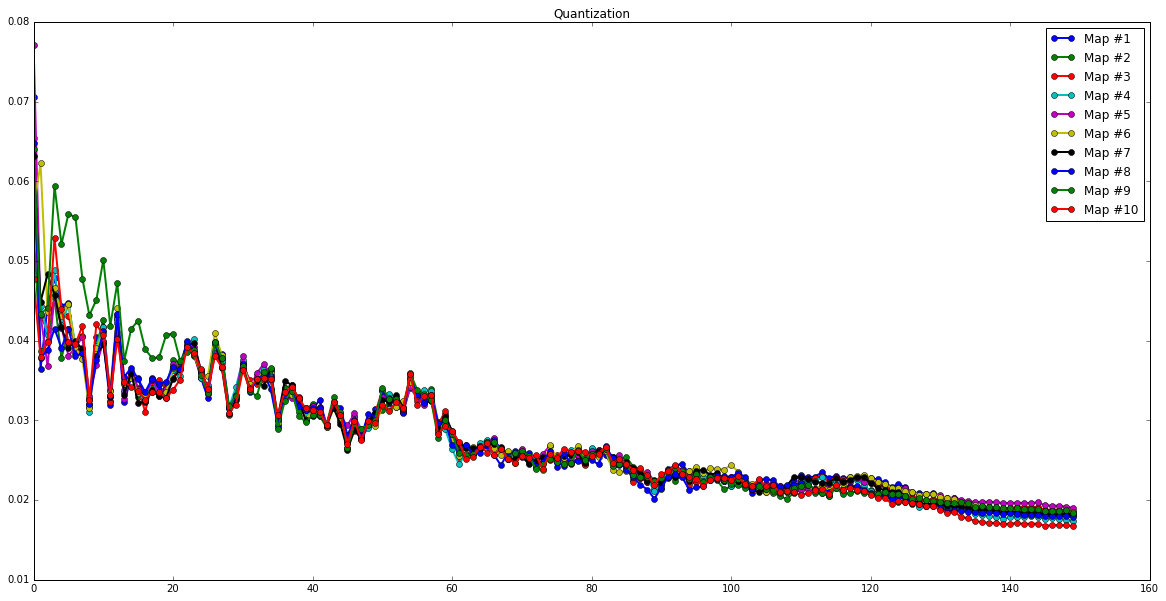

In [11]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [12]:
df_s = pd.read_csv("n_statistics_NoiseInj.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.018255,0,0.158520,0,0.008046,0,948.407087,0,0.000843,0,0.049442,0,0.000079,0,126.836624,0
4526,150,26,0.018255,0,0.177715,0,0.008046,0,997.138241,0,0.000843,0,0.070517,0,0.000079,0,141.982513,0
4527,150,27,0.018255,0,0.192483,0,0.008046,0,1045.356254,0,0.000843,0,0.075291,0,0.000079,0,131.862381,0
4528,150,28,0.018255,0,0.218267,0,0.008046,0,1101.094859,0,0.000843,0,0.095152,0,0.000079,0,157.161026,0
4529,150,29,0.018255,0,0.232099,0,0.008046,0,1150.429454,0,0.000843,0,0.112350,0,0.000079,0,173.289749,0


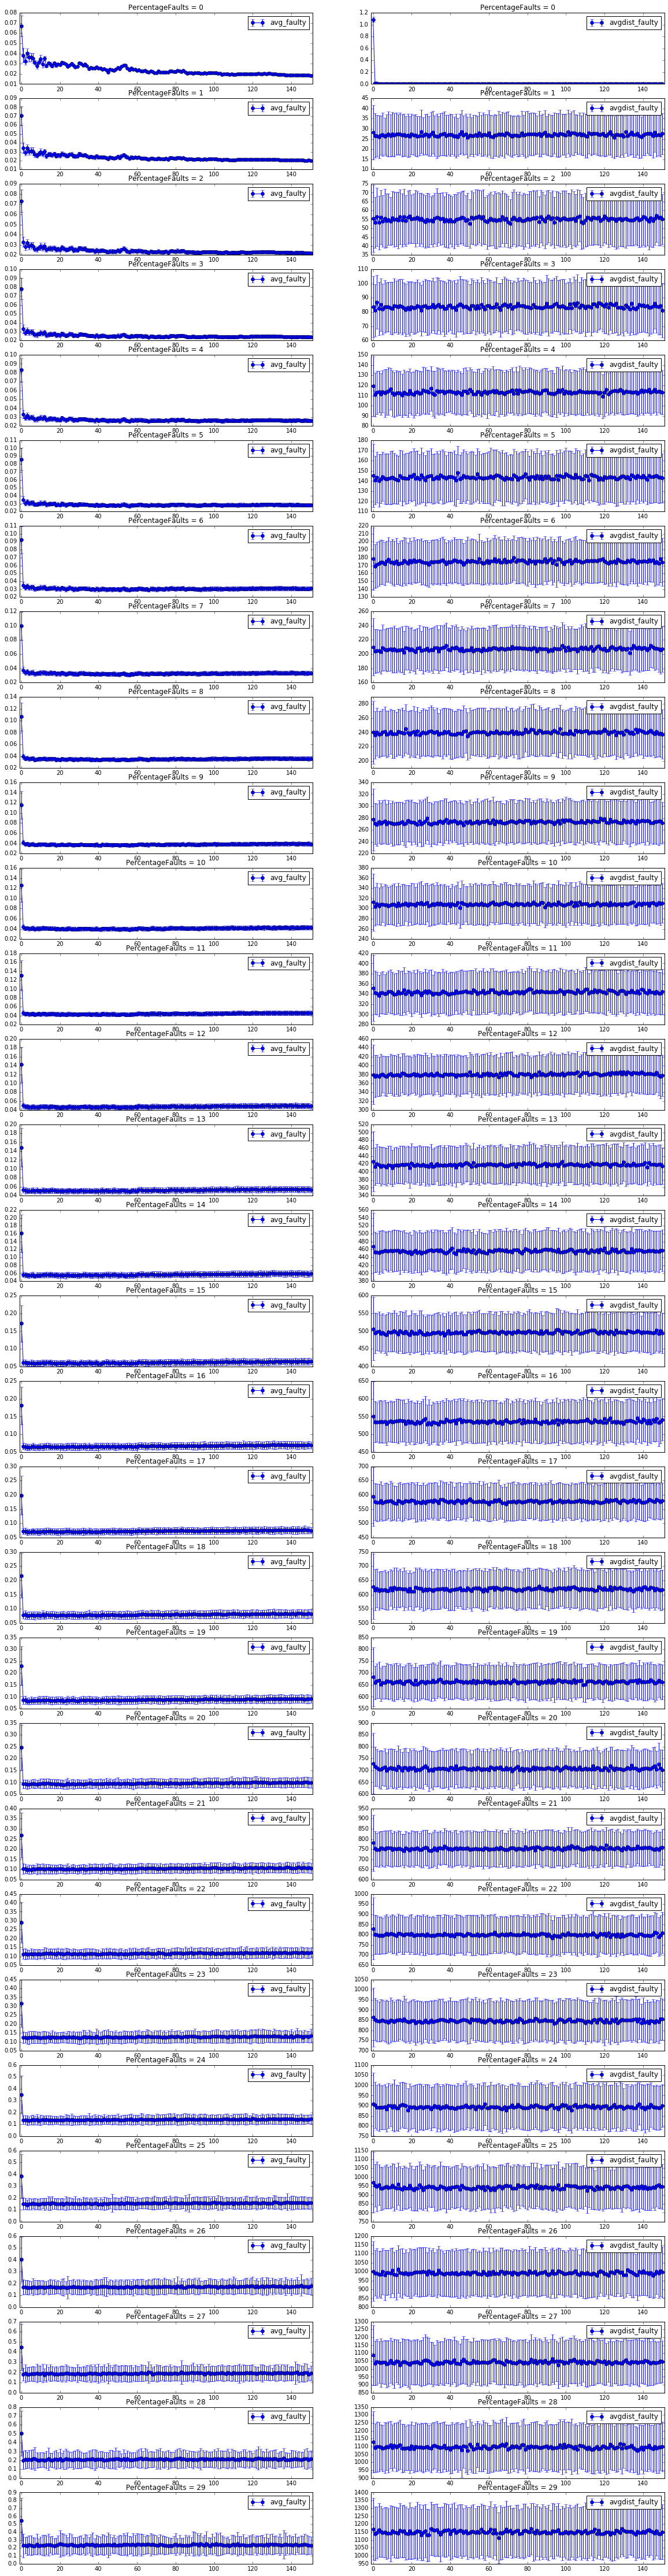

In [13]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1